In [1]:
import pandas as pd
import numpy as np
from Plotter.aggregation import (
    RowFigureConcatenationReport,
    ColumnFigureConcatenationReport,
)
from Plotter.text import TitleReport

from Plotter.line import *
from Plotter.bar import *
from Plotter.table import *
import datetime

import empyrical as ep

In [2]:
validation = pd.read_pickle("New/BRL.pkl")

In [3]:
tickers=[
      'ZF=F', 'ZT=F', 'ZB=F', "ZN=F",
      "ES=F", "YM=F", "NQ=F", "RTY=F",
      "GC=F", "SI=F", "ZC=F", "CL=F", "SB=F", "CT=F",
      "EUR=X", "JPY=X", "GBP=X", 'BRL=X', "MXN=X", "CAD=X"
  ]
ticker = "BRL=X"

In [4]:
todos = pd.Series()
for i in range(25):
    try:
        aux = {}
        aux[f"{ticker}"] = validation[i][f"{ticker}"]
        aux[f"{ticker}_Real"] = validation[i][f"{ticker}_Real"]
        aux[f"{ticker}_Date"] = validation[i][f"{ticker}_Date"]

        validation_output = pd.DataFrame(aux).set_index(f"{ticker}_Date")
        validation_output[f"{ticker}_Real"] = np.exp(validation_output[f"{ticker}_Real"])-1
        validation_output[f"{ticker}"] = np.exp(validation_output[f"{ticker}"])-1
        win_rate_list = np.sign(validation_output[f"{ticker}"]) == np.sign(validation_output[f"{ticker}_Real"])
        validation_output["Returns"] = np.sign(validation_output[f"{ticker}"]) * validation_output[f"{ticker}_Real"]
        validation_output.index.rename('date', inplace=True)
        validation_output.index = pd.to_datetime(validation_output.index)
        one = pd.Series(ep.sharpe_ratio(validation_output["Returns"]), [i])
        todos = pd.concat([todos, one])
    except:
        continue
todos = todos.sort_values()

C:\Users\luizf\AppData\Local\Temp\ipykernel_21884\2756690004.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  todos = pd.Series()


In [5]:
best = []
size = 1
best = best + list(todos.index)[-size:]

In [6]:
best

[8]

In [7]:
aux = {}
aux[f"{ticker}"] = validation[0][f"{ticker}"]
aux[f"{ticker}_Real"] = validation[0][f"{ticker}_Real"]
aux[f"{ticker}_Date"] = validation[0][f"{ticker}_Date"]
validation_output = pd.DataFrame(aux).set_index(f"{ticker}_Date")
validation_output[f"{ticker}"] = validation_output[f"{ticker}"]*0

In [8]:
for k in best:
    validation_output[f"{ticker}"] = validation_output[f"{ticker}"] + validation[k][f"{ticker}"]

validation_output[f'{ticker}'] = validation_output[f'{ticker}']/len(best)


In [9]:
validation_output[f"{ticker}_Real"] = np.exp(validation_output[f"{ticker}_Real"])-1
validation_output[f"{ticker}"] = np.exp(validation_output[f"{ticker}"])-1
win_rate_list = np.sign(validation_output[f"{ticker}"]) == np.sign(validation_output[f"{ticker}_Real"])
validation_output["Returns"] = np.sign(validation_output[f"{ticker}"]) * validation_output[f"{ticker}_Real"]
validation_output.index.rename('date', inplace=True)
validation_output.index = pd.to_datetime(validation_output.index)
full_returns = validation_output[[f'{ticker}_Real', "Returns"]].melt(ignore_index=False, var_name='asset', value_name='Return').reset_index().groupby(['date', 'asset']).sum()['Return']

In [10]:
signs = np.sign(validation_output[f"{ticker}"])
signs.value_counts()

 1.0    679
-1.0     90
Name: BRL=X, dtype: int64

In [11]:
win_rate_list.value_counts()

True     409
False    360
dtype: int64

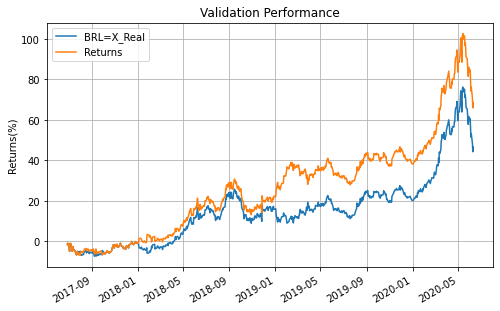

In [12]:
CumulativeReturnsWithBenchmarks.from_returns(full_returns, title='Validation Performance', ylabel='Returns(%)').plot()

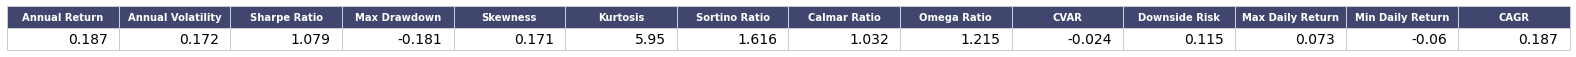

In [13]:
ReturnMetricsTable.from_returns(validation_output['Returns'], font_size=10, num_font_size=14).plot()

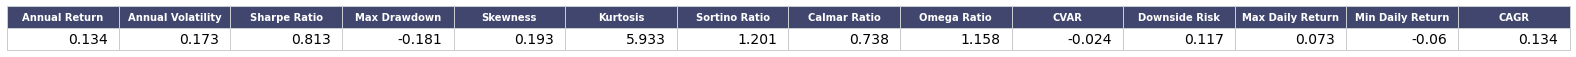

In [14]:
ReturnMetricsTable.from_returns(validation_output[f'{ticker}_Real'], font_size=10, num_font_size=14).plot()